# VII Exploratory Data Analysis <a name="exploratory"></a>

Using the data that we scraped and cleaned from the top Spotify charts in 2019, we begin to examine our data for any trends by first calculating the rolling average (over a two week period).

In [3]:
topfinal=pd.DataFrame()
split=finalsongs2019[finalsongs2019['country']=='Portugal'].index[0]
topfinal=finalsongs2019[:split]
botfinal=finalsongs2019[split:]


**This is the correct order for the top 10 countries from happiest to least happy**
1. Finland
2. Denmark
3. Norway
4. Iceland
5. Netherlands
6. Switzerland
7. Sweden 
8. New Zealand
9. Canada
10. Austria
    
    
**This is the correct order for the bottom 10 happiest countries from happiest to least happy**
    
11. Portugal
12. Philippines
13. Hong Kong
14. Dominican Republic
15. Turkey
16. Malaysia
17. Greece
18. Indonesia 
19. Vietnam
20. South Africa

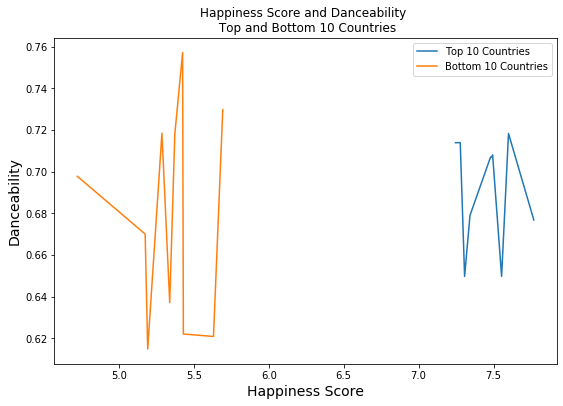

In [4]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="danceability",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="danceability",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("Danceability", size=14)
plt.title("Happiness Score and Danceability \n Top and Bottom 10 Countries")
plt.show()

### Happiness Score and Danceability
#### Graph Description Above & Interpretation
At a first glance, we observe no meaningful relationship between the top 10 countries and the bottom 10 countries as it relates to how danceable the songs these countries listen to are. However, there appears to be a notable trend for the top 10 countries in that the danceability score remains above 0.65 despite there being a decrease at ~7.3 and ~7.51. In comparing both top and bottom 10 countries, however, we cannot draw a truly significant relationship given that many countries from the bottom 10 have relatively high danceability scores – in particular at ~5.3 – as those danceability scores from the top 10 countries. 

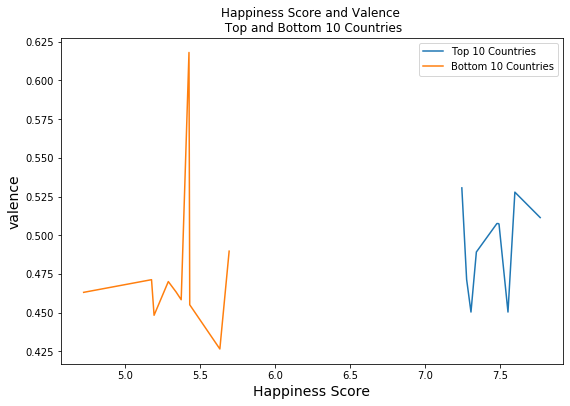

In [5]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="valence",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="valence",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("valence", size=14)
plt.title("Happiness Score and Valence \n Top and Bottom 10 Countries")
plt.show()

### Happiness Score and Valence
#### Graph Description & Interpretation
This graph represents the average valence score for the top and bottom 10 happiest countries. It becomes clear that the bottom 10 countries have a wider range of valence values compared to the top 10 countries. The range of the bottom 10 countries starts from as low as ~0.425 to as high as ~0.620 (a range of ~0.195). Conversely, the top countries' range starts at ~0.450 and only goes as high as ~0.527 ( a range of ~0.077). Most notably, there are considerably more countries – or possibly just one – with higher valence values than any of the top 10 countries. This may due to the presence of an outlier. 

In [6]:
topfinalrolling = topfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
topfinalrolling=topfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [7]:
finalsongs2019.head()

,position,streams,date,url,track_name,artist,region,country,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,rank_x,happiness_rank,happiness_score
0,1,33717,2019-01-01,https://open.spotify.com/track/6MWtB6iiXyIwun0...,Wow.,Post Malone,fi,Finland,0.833,0.539,...,0.1630,0.000002,0.101,0.385,99.947,6MWtB6iiXyIwun0YzU6DFP,149520.0,0,1,7.769
1,2,29651,2019-01-01,https://open.spotify.com/track/25sgk305KZfyuqV...,Sweet but Psycho,Ava Max,fi,Finland,0.719,0.704,...,0.0691,0.000000,0.166,0.628,133.002,25sgk305KZfyuqVBQIahim,187436.0,0,1,7.769
2,3,28329,2019-01-01,https://open.spotify.com/track/4RYtaqxjDJUOY2G...,Harmaa Rinne,Teflon Brothers,fi,Finland,0.861,0.710,...,0.0410,0.000000,0.150,0.962,129.933,4RYtaqxjDJUOY2GrtkLTFf,170886.0,0,1,7.769
3,4,23977,2019-01-01,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next",Ariana Grande,fi,Finland,0.724,0.647,...,0.2800,0.000000,0.102,0.435,106.960,2rPE9A1vEgShuZxxzR2tZH,207333.0,0,1,7.769
4,5,22435,2019-01-01,https://open.spotify.com/track/00WO1oBxZcj9aBo...,Tavallinen,Keko Salata,fi,Finland,0.803,0.537,...,0.6730,0.000010,0.133,0.404,112.964,00WO1oBxZcj9aBoeiODXDx,231791.0,0,1,7.769


In [8]:
finalsongs2019=finalsongs2019.rename(columns={"rank_x":"rank"})

#### Description for Work Above
This is the part where we conduct our rolling average for our updated data frame **finalsongs2019**. In particular, we are using Portugal as an index position – given that this is the first of the bottom 10 countries – in order to consider our bottom and top final observations – or split, for the purpose of then grouping by country. We are conducting the rolling average of two weeks for danceability, which we are then merging on the country column.

In [9]:
rolling2=topfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

#### Description for Work Above
We are performing the rolling average for two weeks for valence. 

In sum, we will have conducted the rolling average of two weeks for both danceability and valence, which we believe may best represent the overall "tune" – or how happy a song is – for a given country. 

*Note: We believe a rolling average is necessary here as it will allow us to understand potential trends with respect to the songs individuals in these countries listen to over the course of 14 days. With this in mind, we are making the assumption that **14 days** will be sufficient to generalize the musical trends over the course of one year – and therein, how happy the music the people of a country listen to. Furthermore, we are assuming the results of this window will allow us to gain more insight into the overall kind of music countries listen to, and how this relates to their happiness ranking as a country.*

In [10]:
topfinalrolling['valence']=rolling2['valence']

In [11]:
rolling2['danceability']=topfinalrolling['danceability']

In [12]:
topfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Finland,0,NaN,7.769,NaN
1,Finland,1,NaN,7.769,NaN
2,Finland,2,NaN,7.769,NaN
3,Finland,3,NaN,7.769,NaN
4,Finland,4,NaN,7.769,NaN
...,...,...,...,...,...
181995,Austria,181995,0.700143,7.246,0.529650
181996,Austria,181996,0.686714,7.246,0.494579
181997,Austria,181997,0.686357,7.246,0.476650
181998,Austria,181998,0.698929,7.246,0.507107


#### Description for Work Above
This new **topfinalrolling** will contain the rolling average of two weeks for **danceability** and **valence** for only the **top 10 countries.**

*Note: The first few observations for our rolling average will be NaN values given that these are the observations being taken to compute the very first rolling average*

In [13]:
botfinalrolling=botfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
botfinalrolling=botfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [14]:
rolling3=botfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

In [15]:
botfinalrolling['valence']=rolling3['valence']

In [16]:
rolling3['danceability']=botfinalrolling['danceability']

In [17]:
botfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Portugal,182000,NaN,5.693,NaN
1,Portugal,182001,NaN,5.693,NaN
2,Portugal,182002,NaN,5.693,NaN
3,Portugal,182003,NaN,5.693,NaN
4,Portugal,182004,NaN,5.693,NaN
...,...,...,...,...,...
181995,South Africa,363995,0.697214,4.722,0.539071
181996,South Africa,363996,0.707429,4.722,0.524857
181997,South Africa,363997,0.714571,4.722,0.496857
181998,South Africa,363998,0.704357,4.722,0.460786


#### Description for Work Above
We are now performing the rolling average for the bottom ten countries. We are still only focusing on danceability and valence. This information will now be saved in the variable name **botfinalrolling**.

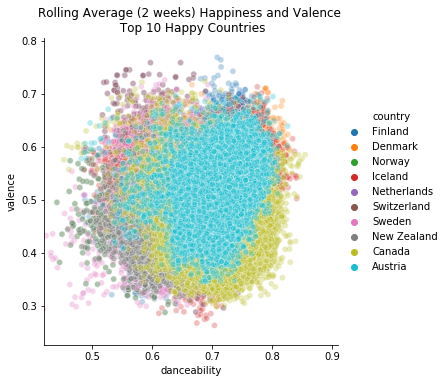

<Figure size 7200x3240 with 0 Axes>

In [18]:
scatter=sns.relplot(x="danceability", y="valence", hue="country", data=topfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.42,0.91))
plt.show()

#### Above Graph Description
This graph is illustrating our rolling average of two weeks for danceability and valence for the top 10 happiest countries, which can be seen on the right. This graph represents the mean of the rolling average for danceability and valence for the top 10 happiest countries.

*Interpretation*<p>For the purpose of our analysis, this means that our top 10 happiest countries listen to midly danceable music. With respect to valence, however, there appears to be a wider range of valence scores that are covered by the songs these top countries listen to. As such, this may be a fruitless metric in attempting to understand the music these top countries listen to. This would imply valence scores largely vary by song, contrary to danceability, which is more uniform.

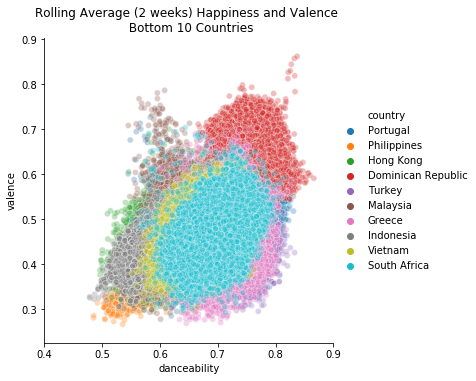

<Figure size 7200x3240 with 0 Axes>

In [19]:
scatter=sns.relplot(x='danceability', y='valence', hue='country', data=botfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Bottom 10 Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.4,0.9))
plt.show()

#### Above Graph Description
This graph is illustrating our rolling average of two weeks for danceability and valence for the bottom 10 happiest countries, which can be seen on the right. 

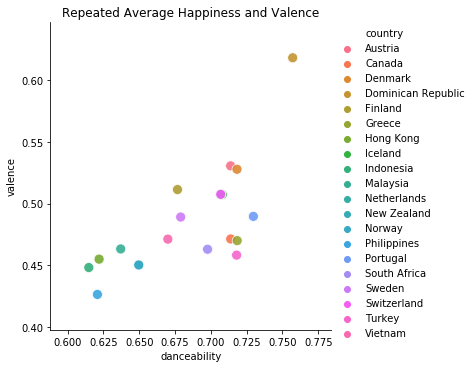

In [21]:
avg=finalsongs2019.groupby('country').mean()
scatter=sns.relplot(x='danceability', y='valence', hue=avg.index, data=avg, alpha=0.9, s=100)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
# plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])

plt.title("Repeated Average Happiness and Valence")
plt.show(scatter)

#### Above Graph Description
This graph is displaying our average danceability and valence for the top 10 and the bottom 10 happiest countries, which can be seen on the right. We decided to graph both the average danceability and average valence for each of the 20 countries to see if there was any pattern, and we have come to find a very subtle pattern. The bottom 10 countries have a slightly lower average score than that of the top 10 countries (e.g., Indonesia compared to Denmark), but this is not significant. It is important to point out the outlier of the Dominican Republic. Although the Dominican Republic is said to be one of the bottom 10 happiest countries, it has the highest average danceability and average valence score (average danceability score of about 0.755 and average valence score of about 0.63). We assume this has to do with outside factors, which may include  culture.

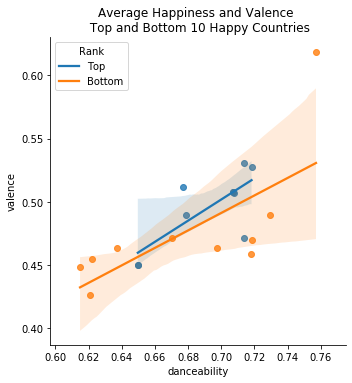

In [22]:
scatter=sns.lmplot(x='danceability', y='valence', hue='rank',data=avg, legend=False)
plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])
plt.title("Average Happiness and Valence \n Top and Bottom 10 Happy Countries")
plt.show(scatter)


#### Graph Description Above & Interpretation
<p> Contrary to our expectations, the top 10 happiest countries do not coincidentally have the highest danceability or valence scores. There appears to be a wide range of danceability and valence scores for all top and bottom countries, which may signify no notable relationship between the danceability and valence scores and the happiness scores of the top countries. We expected more tightly clustered results for both top and bottom happy countries. <p>
    
<p>It becomes clear, however, that there is a wider range of values for danceability and valence covered by the bottom 10 happiest countries, which makes sense given that these countries start at a lower danceability and valence score than the top 10 countries. Specifically, the danceability of the bottom countries begins at ~0.61, compared to ~0.66 for the top countries. Similarly, the valence score for the bottom countries begins at ~0.43, as opposed to ~0.45 for the top countries.<p>

<p> It is worth noting that the Dominican Republic is an outlier in this analysis given that it has the highest danceability and valence score despite being one of the bottom top countries (at number 14). It can be argued that the country contributes to "happy music" despite the country itself ranking pretty low in the happiness rank – likely due to political instability, or other non-music related factors. <p>
    
<p>As it pertains to our research question, the lower range of valence and danceability scores for the bottom 10 countries supports the fact less happier countries listen to music that is not as danceable or "happy," which is consistent with our hypothesis. The case of the Dominican Republic, however, raises an inconsistency in that a less happier country can still listen to far more danceable music by a significant margin. The fact that many of the bottom 10 countries rank in the same range of danceability and valence scores as the top countries make these results almost insignificant. By insignicant we mean dificult to say that there is any relationship between how happy a country is and the music the country listens to. Other features may nonetheless be at play – independent of danceability and valence – to still assess the signficance of music on a country's overall happiness rank.<p>

In [23]:
withoutdr=avg.drop(["Dominican Republic"],axis=0)

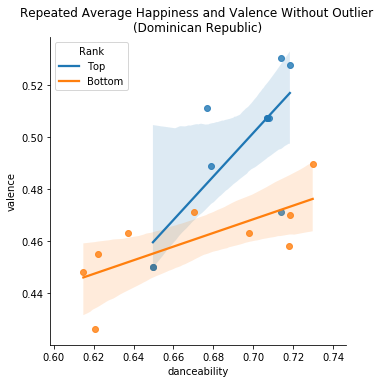

In [24]:
scatter=sns.lmplot(x='danceability', y='valence', hue="rank",data=withoutdr, legend=False)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])
plt.title("Repeated Average Happiness and Valence Without Outlier \n(Dominican Republic)")
plt.show(scatter)

#### Graph Description Above
An outlier by definition lies an abnormal distance from other observations and escapes normality. Most importantly, it affects the direction of all observations in the data set by skewing it in a particular direction depending on how extreme – or distant – it is from the rest of the observations. With this in mind, we wanted to see the extent to which the line of best fit for the top countries would be impacted without the Dominican Republic (the outlier). 

**Interpretation**
<br>As can be seen, this line of best fit for the top countries became steeper without the Dominican Republic, asserting its influence on the rest of our observations. There is far clearer linear relationship for all the top countries, which seems to be far more removed from the rest of the bottom countries. We will evaluate this line of best fit by performing a linear regression model later in our analysis. Most notably, we also noticed the influence Canada had in the overall relationship for the top countries: the only top country in "bottom country" territory at ~0.72 danceability and ~0.47 valence besides New Zealand (which is merely the first top country with the lowest danceability and valence score).<br>

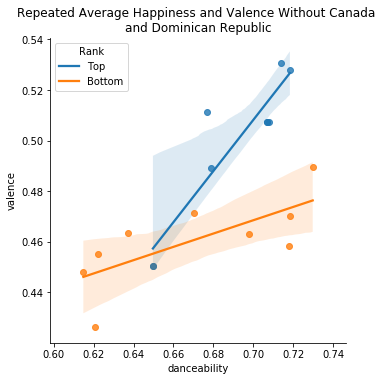

In [25]:
withoutca=avg.drop(["Dominican Republic","Canada"],axis=0)
scatter=sns.lmplot(x='danceability', y='valence', hue="rank",data=withoutca, legend=False)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])
plt.title("Repeated Average Happiness and Valence Without Canada \nand Dominican Republic")
plt.show(scatter)

#### Graph Description Above
This graph represents the repeated average happiness score for danceability and valence but with the Dominican Republic and Canada excluded. We decided to exclude Canada because of its abnormally, near-outlier position in the territory of the rest of the bottom countries. It should be noted that although Canada ranked relatively low for valence – which is partly what prompted us to exclude it from this graph – its danceability was relatively high, so its relevance as a top country is still noteworthy, albeit still in "bottom country" territory. As stated, we wanted to see the overall trend of all top countries without a country lagging behind the rest of the top countries.
<br><br>
**Interpretation**
<br>
As expected, the line of best fit for the top countries became steeper, further veering away from the bottom countries. It can be argued our hypothesis is confirmed by this graph since top countries (over 90%) tend to have significantly higher valence scores than bottom countries; however, we are skeptical about this conclusion given the similar range of danceability scores of both top and bottom countries. Further, it would be innacurate to say our hypothesis is confirmed simply because the average valence scores for the top countries are higher than the bottom countries. We will evaluate this trend later with a linear regression model. <br>

Now we are printing the original happy dataframe but with the average spotify audio feature score for their top daily songs in its own column. This will be useful for any computations or graphic we try and make later in the project.

####  Description for Work Above
We understand there were not many significant trends using rolling average for danceability and valence as it pertains to the top and bottom ten countries. Therefore, we will see which features show the highest correlation with happiness score and happiness rank and attempt to draw our following analysis from these results.

In [26]:
avg

,position,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank,happiness_rank,happiness_score
country,,,,,,,,,,,,,,,,,
Austria,25.5,16462.584011,0.713867,0.662443,5.689011,-6.275741,0.430055,0.155285,0.249452,0.010681,0.153707,0.530584,121.137222,187213.974231,0.0,10.0,7.246
Canada,25.5,105777.108516,0.713905,0.594117,5.139505,-6.508806,0.545824,0.130653,0.240444,0.011077,0.169140,0.471375,117.942354,191437.583187,0.0,9.0,7.278
Denmark,25.5,37138.216813,0.718297,0.608354,5.452143,-6.452041,0.455000,0.126762,0.236351,0.007709,0.152468,0.527824,118.132190,185525.915714,0.0,2.0,7.600
Dominican Republic,25.5,7559.400769,0.757185,0.703511,6.165440,-4.862544,0.527857,0.146937,0.260556,0.006872,0.161468,0.618115,124.096521,230480.686209,1.0,77.0,5.425
Finland,25.5,27875.240879,0.676773,0.663020,5.129560,-6.368836,0.446484,0.092529,0.201814,0.009496,0.168731,0.511384,119.129309,199207.537033,0.0,1.0,7.769
Greece,25.5,6125.118736,0.718423,0.632274,5.500055,-6.665205,0.448297,0.138264,0.252965,0.013671,0.158110,0.470025,119.224728,195010.707857,1.0,82.0,5.287
Hong Kong,25.5,7709.870385,0.622039,0.566009,5.290769,-6.735000,0.682473,0.081686,0.341515,0.007200,0.166651,0.455022,119.366519,211687.606703,1.0,76.0,5.430
Iceland,25.5,3493.017747,0.708010,0.575703,5.475385,-7.531244,0.501923,0.114460,0.253068,0.015873,0.175444,0.507280,120.274468,191780.606703,0.0,4.0,7.494
Indonesia,25.5,97616.694066,0.614861,0.524393,5.441923,-7.401547,0.740055,0.068383,0.386864,0.005162,0.160713,0.448238,115.804843,220788.384121,1.0,92.0,5.192


In [27]:
avg=avg.sort_values(["happiness_score"],ascending=False)

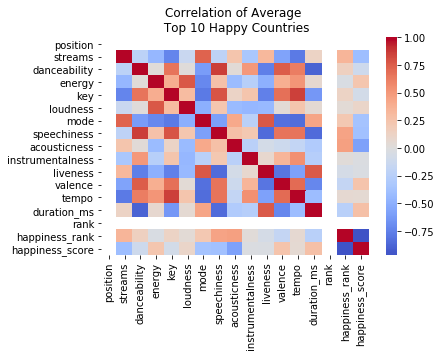

In [28]:
sns.heatmap(avg.head(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Top 10 Happy Countries")
plt.show()

#### Above Graph Description
*Interpretation*<p>In regards to interpreting this heatmap, the colors that are closest to red means that the correlation is positive, and the colors that are closest to blue means that the correlation is negative. The darker the shade of the color the stronger, the correlation is with the two features, and the lighter the shade of the color is, the weaker the correlation is because it is closest to the value of 0.0 (referring to the heatmap meter to the right). 

This graph represents the average of all of the features and its correlations with each other for the top 10 happiest countries. Additionally, it is also representative of the average for each feature and its correlation with the happiness score. When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light. The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the top 10 happiest countries has is with the average acousticness, but the correlation is still weak. 

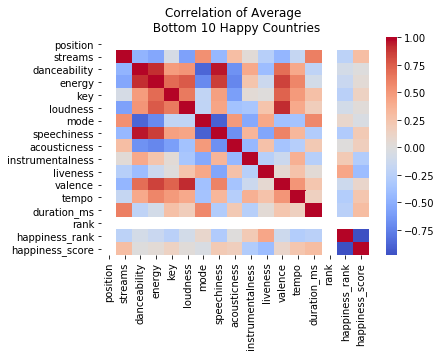

In [29]:
sns.heatmap(avg.tail(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Bottom 10 Happy Countries")
plt.show()

#### Above Graph Description
This graph represents the average of all of the features and its correlations with each other for the bottom 10 happiest countries. Additionally, it is also representative of the average for each feature and its correlation with the happiness score. When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light, almost close to white which means that the correlation is close to 0.0 (no correlation). The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the bottom 10 happiest countries has is with the average liveness, but the correlation is still weak. 

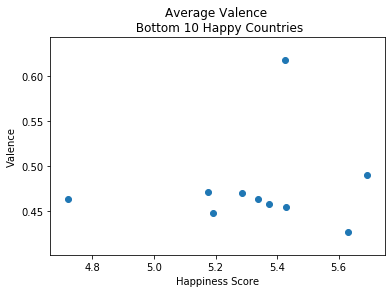

In [30]:
plt.scatter(avg.tail(10)['happiness_score'],avg.tail(10)['valence'])
plt.title("Average Valence \n Bottom 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

#### Above Graph Description
This graph is illustrating the average of valence for the bottom 10 happiest countries. This graph's purpose was to see if there were any physical trends of the average valence score for each of the bottom 10 happiest countries and the happiness score of that country. From the looks of it, there is not a hint of any relationship between these two features. However, there are some outliers present within the data of the average valence scores for the bottom 10 happiest countries (data points that are above 5.4 for the happiness score, below 5.0 for the happiness score, and above 0.60 for the valence score). 

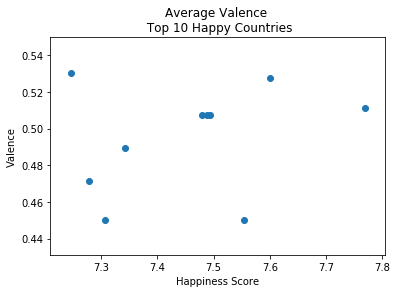

In [31]:
plt.scatter(avg.head(10)['happiness_score'],avg.head(10)['valence'])
plt.title("Average Valence \n Top 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

#### Above Graph Description
This graph shows the average of valence for the top 10 happiest countries. Similar to the previous graph, this graph's purpose was also to see if there were any physical trends of the average valence score for each of the top 10 happiest countries and the happiness score of that country. From the looks of it, there is not any form of a relationship between these two features. The data seems to be spread out across the graph. Some of the data points do, however, overlap with one another (countries with a hppiness score of around 7.4). 

In [32]:
happy2020=pd.read_csv('happiness2020.csv')
happy2020=happy2020[['Country name','Ladder score']]
happy2020['happiness_rank']=happy2020.index.copy()
happy2=happy2020.happiness_rank.to_numpy()
happy2=happy2+1
happy2020['happiness_rank']=happy2

In [33]:
cols2020= [x.lower() for x in happy2020.columns] 
cols2020= [x.replace(" ","_") for x in cols2020] 
happy2020.columns=cols2020

In [34]:
happy2020

,country_name,ladder_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
...,...,...,...
148,Central African Republic,3.4759,149
149,Rwanda,3.3123,150
150,Zimbabwe,3.2992,151
151,South Sudan,2.8166,152
